# Assignment 2: K-Means Clustering
### Group 4 - Chatur Chaukdi
- Akshat Mittal, 200101011
- Dhananjai, 200101029
- Pranjal Baranwal, 200101083
- Satvik Tiwari, 200101091

###### Importing modules and loading data set

In [303]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score, confusion_matrix, adjusted_rand_score
import seaborn as sns
%matplotlib inline
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df.head()

,CGPA,IQ,Section
0,5.13,88,A
1,5.90,113,B
2,8.36,93,C
3,8.27,97,C
4,5.45,110,B


###### Plot Original Data

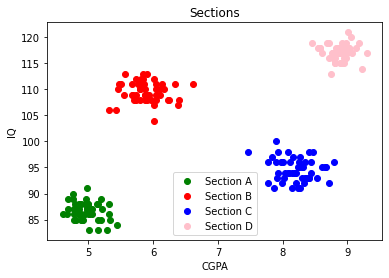

In [304]:
df1 = df[df.Section=='A']
df2 = df[df.Section=='B']
df3 = df[df.Section=='C']
df4 = df[df.Section=='D']
plt.scatter(df1.CGPA,df1.IQ,color='green',label='Section A')
plt.scatter(df2.CGPA,df2.IQ,color='red',label='Section B')
plt.scatter(df3.CGPA,df3.IQ,color='blue',label='Section C')
plt.scatter(df4.CGPA,df4.IQ,color='pink',label='Section D')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Sections')
plt.legend()
plt.show()

###### Scalling Data

In [305]:
scaler = MinMaxScaler()

scaler.fit(df[['IQ']])
df['IQ'] = scaler.transform(df[['IQ']])

scaler.fit(df[['CGPA']])
df['CGPA'] = scaler.transform(df[['CGPA']])

###### Train the model

In [306]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['CGPA','IQ']])
df['cluster'] = y_predicted

###### Plot the clusters

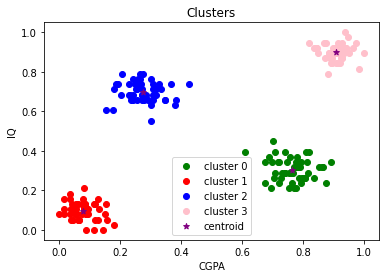

In [307]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.CGPA,df1.IQ,color='green', label='cluster 0')
plt.scatter(df2.CGPA,df2.IQ,color='red', label='cluster 1')
plt.scatter(df3.CGPA,df3.IQ,color='blue', label='cluster 2')
plt.scatter(df4.CGPA,df4.IQ,color='pink', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Clusters')
plt.legend()
plt.show()

###### Confusion Matrix

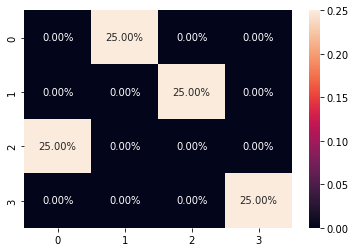

In [308]:
label = df.replace({'Section' : { 'A' : 0, 'B' : 1, 'C' : 2, 'D':3 }}).Section
conf_mat = confusion_matrix(label,df.cluster)
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%')
plt.show()

###### Adjusted Random Score

In [309]:
print("Adjusted Rand Score for k = 4: ", adjusted_rand_score(label,df.cluster))

Adjusted Rand Score for k = 4:  1.0


###### Elbow Method

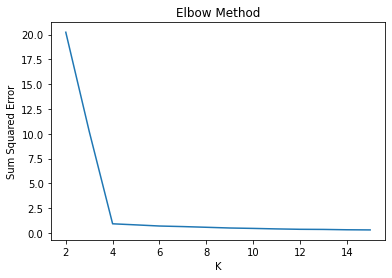

In [310]:
sse = []
k_rng = range(2,16)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['CGPA','IQ']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum Squared Error')
plt.plot(k_rng,sse)
plt.title("Elbow Method")
plt.show()

###### Silhoutte Method

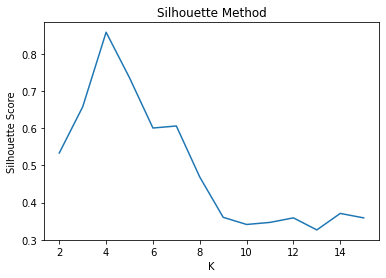

In [311]:
score = []
k_rng = range(2,16)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['CGPA','IQ']])
    score.append(silhouette_score(df[['CGPA','IQ']], km.labels_, metric='euclidean'))
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.plot(k_rng,score)
plt.title("Silhouette Method")
plt.show()

###### Adjusted Random Score Method

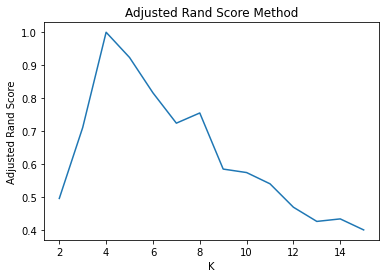

In [312]:
score = []
label = df.replace({'Section' : { 'A' : 0, 'B' : 1, 'C' : 2, 'D':3 }}).Section
k_rng = range(2,16)
for k in k_rng:
    km = KMeans(n_clusters=k)
    y_predicted = km.fit_predict(df[['CGPA','IQ']])
    score.append(adjusted_rand_score(label,y_predicted))
plt.xlabel('K')
plt.ylabel('Adjusted Rand Score')
plt.plot(k_rng,score)
plt.title('Adjusted Rand Score Method')
plt.show()